In [1]:
import numpy as np
import requests
import io
import matplotlib.pyplot as plt


In [2]:
def loadData(file,rydd='Y'):
    
    '''
    Denne funksjonen skal
    - Lese inn et datasett fra github mappen til Ekte Data.
    - Returnere en tidsvektor og en matrise med selve verdiene.

    Input 
    file     : Navnet på .txt-filen (ikke inkluder stien her, kun filnavnet)
    rydd : 'Y' (yes, default) hvis jeg vil at datasettet skal være noenlunde
    ferdig ryddet ved innlasting. 'N' (no, eller hva som helst annet enn 'Y') 
    hvis dette er en del av oppgaven.
    
    Output
    data      : En vektor eller matrise (avhengig av om datasettet som leses inn
    er årlig eller månedlige gjennomsnitt) med alle verdiene i datasettet
    tid     : Tidsvektoren til datasettet.
    
    data : Hvis rydd != 'Y' returneres hele datasettet som en matrise.
    
    '''
    

    # Simply using genfromtxt doesn't work due to caching issues. We need to 
    # read the data from url to a file and THEN give this string to genfromtxt.
    url = 'https://raw.githubusercontent.com/irendundas/EkteData/main/'+file
    req = requests.get(url)
    f = io.StringIO(req.text)

    f.seek(0) # set cursor to the top
    data=np.genfromtxt(f,dtype=float)
    
    #=================================
    # Last inn dataene med np.genfromtxt som vi har brukt før
    # Prøv først å laste det inn uten å opggi info om delimeter og skip_header

    
    # Sjekk om dette funket eller om alt ble NaN.  Dersom alt ble NaN laster vi
    # inn datasettet på nytt og inkluderer info om delimeter og skip_header
    if len(data) == len(np.nonzero(data)[0]):
        f.seek(0) # set cursor to the top
        data = np.genfromtxt(f, dtype=float, delimiter=',',skip_header=1)
           
    # Default er 'Y' - stort sett vil jeg ha ferdig ryddede data, men for  
    # eksempelet RyddDatasett er dette en del av oppgaven.
    if rydd=='Y':
        # Sett eventuelle "fyll-verdier" til NaN
        data[data==-999.99]=np.nan     
    
        # Tidsvektor med desimaler
        tid=data[:,0]
    
        # Selve dataene
        data=data[:,1:]
        return data, tid
    else:
        return data
    


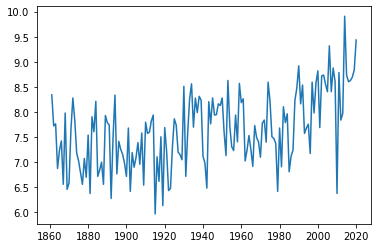

In [6]:
data=loadData('TempBergenYearlyNonan.txt',rydd='N')
plt.plot(data[:,0],data[:,1])

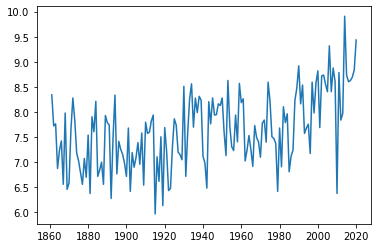

In [9]:
temp,tid=loadData('TempBergenYearlyNonan.txt')
plt.plot(tid,temp)
plt.show()